
<div align="center">

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dapivei/causal-infere/blob/main/sections/10_Instruments.ipynb)

</div>

$$
\begin{array}{c}
\textbf{INSTRUMENTAL VARIABLES}\\\\
\text(PART \, I)\\\\
\textbf{Daniela Pinto Veizaga, Xiang Pan, and Xiang Gao} \\
\textit{Center for Data Science, New York University} \\\\\\
\textit{November 8, 2024}
\end{array}
$$
---



## 0. Recap From Last Class
+ Control variables, matching

## 1. Goals For Today

1. Understand what instrumental variables (IVs) are and when they are used.
2. Explore the assumptions needed for an IV to yield valid causal estimates.
3. Implement IV estimation with Python using Ordinary Least Squares (OLS) and Two-Stage Least Squares (2SLS


## 2. Instrumental Variables

Imagine we want to estimate the **causal effect** of a treatment variable, $S$, on some outcome, $Y$. But there’s a problem: we suspect that $S$ is **correlated with unobserved factors** that also affect $Y$. These unobserved factors are captured by the variable $U$. This means:

$$S \not\!\perp\!\!\!\perp U,$$

In other words, $S$ and $U$ are related, which can lead to **biased and inconsistent estimates** when we try to estimate the causal effect of $S$ on $Y$.

> **But is there a way to estimate the causal effect despite this problem?**  
**Yes!** We can use an **instrumental variable (IV)** to help us out.

### What is an Instrumental Variable?

An **instrumental variable (IV)**, denoted by $Z$, is a variable that:
- **Affects** the treatment variable $S$.
- Has **no direct effect** on the outcome variable $Y$.
- Is **independent** of the unobserved confounders $U$ that are correlated with both $S$ and $Y$.

The goal is that the instrument $Z$ can help us isolate the variation in $S$ that is **uncorrelated** with the unobserved confounders $U$, allowing us to estimate a more accurate causal effect.

<img src="https://raw.githubusercontent.com/dapivei/causal-infere/main/images/instrument.png" width="500"/>

### When Should We Use IVs?

Instrumental Variables are especially useful when:
> - The treatment variable $S$ suffers from **measurement error**, **omitted variable bias**, or **reverse causality** (where $Y$ affects $S$ instead of the other way around).

### Key Assumptions for a Valid Instrument

For $Z$ to be a valid instrument, it must satisfy three important assumptions:

1. **Exogeneity**:  
   The instrument $Z$ must be **uncorrelated** with the error term $U$ (or other unobserved factors that affect $S$), i.e., $Z$ must not be influenced by any variables that also affect $Y$. This assumption ensures that $Z$ affects $S$ but not $Y$ directly.  
   $$ U \perp Z \quad \text{and} \quad V \perp Z $$

2. **Relevance**:  
   The instrument $Z$ must have a **significant** effect on the treatment $S$. In other words, $Z$ should change the likelihood that someone receives the treatment $S$, at least for some sub-group of the population.  
   $$ S(Z=1, V) \neq S(Z=0, V) $$

3. **Monotonicity**:  
   The instrument $Z$ must affect $S$ in the **same direction** for all individuals. That is, $Z$ should only either **increase** or **decrease** the likelihood of receiving treatment, but not both.  
   $$ S(Z=1, V) > S(Z=0, V) $$

### Local Average Treatment Effect (LATE)

If these assumptions hold, we can estimate the **Local Average Treatment Effect (LATE)**. This is the causal effect of $S$ on $Y$ for a specific group of people called the **compliers**—those whose treatment status is affected by the instrument $Z$.

> **Compliers** are individuals whose treatment $S$ is influenced by the instrument $Z$. They are the population we can estimate the causal effect for using IVs.

### Types of Individuals in IV Analysis

The population can be divided into four groups based on how they respond to the instrument $Z$:

1. **Always-takers**: These individuals always take the treatment, regardless of the instrument $Z$.  
   $$ S(Z=1, V) = S(Z=0, V) = 1 $$

2. **Never-takers**: These individuals never take the treatment, regardless of the instrument $Z$.  
   $$ S(Z=1, V) = S(Z=0, V) = 0 $$

3. **Compliers**: These individuals comply with the instrument. They take the treatment when $Z = 1$, but not when $Z = 0$.  
   $$ S(Z=1, V) = 1 \quad \text{and} \quad S(Z=0, V) = 0 $$

4. **Defiers**: These individuals do the opposite of what the instrument suggests. They take the treatment when $Z = 0$, but not when $Z = 1$.  
   $$ S(Z=1, V) = 0 \quad \text{and} \quad S(Z=0, V) = 1 $$

### Identifying the Local Average Treatment Effect (LATE)

Now, let’s define the causal model for $Y$ in terms of $S$ and $U$:

$$ Y = \alpha_0 + \alpha_1 S + U $$

Here, $\alpha_1$ represents the **causal effect** of $S$ on $Y$, and $U$ is the error term (which captures unobserved factors that affect $Y$).

We can use the instrument $Z$ to estimate this effect by using the **Wald estimator**:

$$ \alpha_1^{IV} = \frac{\text{Cov}(Z,Y)}{\text{Cov}(Z,S)} $$

This is the ratio of the covariance between the instrument $Z$ and the outcome $Y$, to the covariance between the instrument $Z$ and the treatment $S$.

In terms of conditional expectations, we can express this as:

$$ \alpha_1^{IV} = \frac{\mathbb{E}[Y | Z=1] - \mathbb{E}[Y | Z=0]}{\mathbb{E}[S | Z=1] - \mathbb{E}[S | Z=0]} $$

This equation shows that the **LATE** is the **difference in outcomes** between those who received the treatment and those who did not, **for the compliers**.


## 3. Motivating Case: The effect of watching sesame street on later academic achievement.




<img src="https://www.aeaweb.org/content/file?id=8888.png?raw=true" width="500" height="auto" />



### Research Question

> Does watching Sesame Street ($S$) have a positive impact on later academic achievement ($Y$)?


### The challenge

Isolating the effect of watching Sesame Street on academic achievement from unobserved confounders, such as socio-economic status. These unobserved factors may influence both:
+  a child's likelihood of watching the program and
+ their academic outcomes,

leading to biased estimates.


### Solution?

Introduce an instrumental variable—${\tt encouragement}$ ($Z$)—that we can control and randomize. Encouragement could involve giving children additional information or motivational support to watch Sesame Street. This helps isolate the causal effect of watching the show on academic outcomes.

### Model Setup

\begin{aligned}
S & =\left\{\begin{array}{l}
1 \text { if watched Sesame }  \\
0 \text { did not watched Sesame}
\end{array}\right. \\
Y(S, U) & =\text {Score on a literacy test} \\
U & =\text { other determinants of } Y,
\end{aligned}

where:

$U$ represents other determinants of $Y$ (e.g., socio-economic status).


### Endogeneity


$$S \not\!\perp\!\!\!\perp U,$$

as various family and individual factors likely influence whether a child watches the program $S$ and the child's later academic outcomes ($Y$).



### Data

- **`encour`**: Indicator variable for whether the child was encouraged to watch Sesame Stree. Instrument $Z$.
- **`watched`**: Indicator variable for whether the child actually watched Sesame Street. Treatment $S$.
- **`letters`**: Score on a literacy test. Outcome $Y$.
- **`age`**: Age of the child (in months), included as a control variable.
- **`female`**: Indicator variable for gender (female), included as a control variable.
- **`Other variables`**: Various additional factors.


In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

from matplotlib.colors import LinearSegmentedColormap
from scipy import stats


url = "https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Sesame/data/sesame.csv"
sesame = pd.read_csv(url)
sesame.head()

,rownames,id,site,sex,age,viewcat,setting,viewenc,prebody,prelet,...,encour,_Isite_2,_Isite_3,_Isite_4,_Isite_5,regular,watched,encouraged,y,pretest
0,1,1,1,1,66,1,2,1,16,23,...,1,0,0,0,0,0,0,1,30,23
1,2,2,1,2,67,3,2,1,30,26,...,1,0,0,0,0,1,1,1,37,26
2,3,3,1,1,56,3,2,2,22,14,...,0,0,0,0,0,1,1,0,46,14
3,4,4,1,1,49,1,2,2,23,11,...,0,0,0,0,0,0,0,0,14,11
4,5,5,1,1,69,4,2,2,32,47,...,0,0,0,0,0,1,1,0,63,47


In [2]:
sesame.columns

Index(['rownames', 'id', 'site', 'sex', 'age', 'viewcat', 'setting', 'viewenc',
       'prebody', 'prelet', 'preform', 'prenumb', 'prerelat', 'preclasf',
       'postbody', 'postlet', 'postform', 'postnumb', 'postrelat', 'postclasf',
       'peabody', 'agecat', 'encour', '_Isite_2', '_Isite_3', '_Isite_4',
       '_Isite_5', 'regular', 'watched', 'encouraged', 'y', 'pretest'],
      dtype='object')

In [3]:
sesame.describe()[['watched', 'encouraged']]

,watched,encouraged
count,240.000000,240.000000
mean,0.775000,0.633333
std,0.418455,0.482902
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


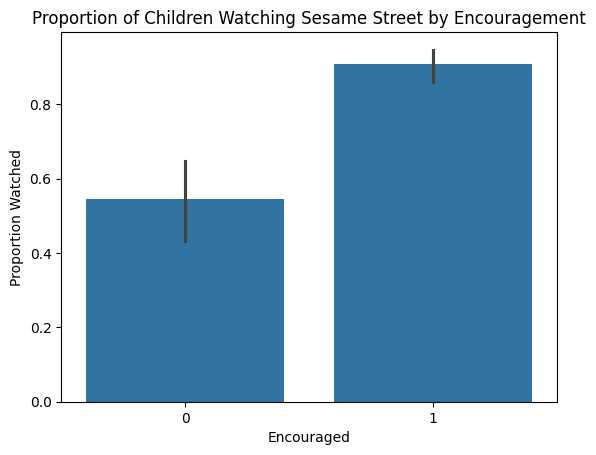

In [4]:
sns.barplot(x=sesame['encour'], y=sesame['watched'])
plt.title('Proportion of Children Watching Sesame Street by Encouragement')
plt.xlabel('Encouraged')
plt.ylabel('Proportion Watched')
plt.show()

### How plausible is ${\tt encouragement}$ as an instrument?


**Exogeneity**

We test whether encouragement is randomly assigned across relevant variables, ensuring balance between the encouraged and non-encouraged groups.

In [5]:
# List of variables to test for balance
variables_to_test = ['age', 'sex', 'pretest']

# Perform t-tests for each variable
for var in variables_to_test:

    # Split the data by encouragement status
    group_1 = sesame[sesame['encouraged'] == 1][var]
    group_0 = sesame[sesame['encouraged'] == 0][var]

    # Perform the t-test to compare means
    t_stat, p_value = stats.ttest_ind(group_1, group_0, equal_var=False)

    # Print results
    print(f'Test for {var}:')
    print(f'T-statistic: {t_stat:.4f}, p-value: {p_value:.4f}')
    print('---')

    # Interpretation
    if p_value < 0.05:
        print(f"  Significant difference in {var}, suggests imbalance.\n")
    else:
        print(f"  No significant difference in {var}, supports balance.\n")


Test for age:
T-statistic: -0.3590, p-value: 0.7200
---
  No significant difference in age, supports balance.

Test for sex:
T-statistic: -0.3115, p-value: 0.7557
---
  No significant difference in sex, supports balance.

Test for pretest:
T-statistic: -1.4258, p-value: 0.1561
---
  No significant difference in pretest, supports balance.





**Relevance**

For the instrument to be relevant, it must be correlated with $S$ -- watching Sesame Street. We test this using a linear regression model.


In [6]:
# Add a constant to the model
sesame['const'] = 1

# Fit a linear regression model (OLS) for relevance
relevance_model = sm.OLS(sesame['watched'], sesame[['const', 'encouraged']]).fit()
print(relevance_model.summary())


                            OLS Regression Results                            
Dep. Variable:                watched   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     50.46
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.40e-11
Time:                        19:57:11   Log-Likelihood:                -107.88
No. Observations:                 240   AIC:                             219.8
Df Residuals:                     238   BIC:                             226.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5455      0.041     13.434      0.0

+ The coefficient is 0.3624, meaning that being encouraged to watch Sesame Street increases the likelihood of watching the program by approximately 36.24% compared to those who were not encouraged.
+ Statistical Significance: The p-value for encouraged is 0.000, which is highly significant. This suggests that the encouragement to watch Sesame Street has a statistically significant effect on the outcome.

The relevance of the instrument is confirmed!




**Monotonicty**


We perform a logistic regression to check for monotonicity, which ensures that the instrument  does not induce defiers (children who behave contrary to encouragement).

In [7]:
monotonicity_model = sm.Logit(sesame['watched'], sesame[['const', 'encouraged', 'age', 'sex', 'site']]).fit()
print(monotonicity_model.summary())


Optimization terminated successfully.
         Current function value: 0.389264
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                watched   No. Observations:                  240
Model:                          Logit   Df Residuals:                      235
Method:                           MLE   Df Model:                            4
Date:                Thu, 07 Nov 2024   Pseudo R-squ.:                  0.2699
Time:                        19:57:11   Log-Likelihood:                -93.423
converged:                       True   LL-Null:                       -127.96
Covariance Type:            nonrobust   LLR p-value:                 3.564e-14
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9288      1.841      1.048      0.295      -1.679       5.537
encouraged     2.5268      0.

+ Encouragement has a significant positive effect on the likelihood of watching Sesame Street ($p < 0.05$).
+ Age, sex, and site have less impact, which supports monotonicity.

Overall, our instrument seems pretty plausible!

#### Compliance Types

Let's further categorized our population of interest!


- **Compliers**: Watch Sesame Street only if encouraged.
- **Always-takers**: Watch Sesame Street regardless of encouragement.
- **Never-takers**: Do not watch Sesame Street regardless of encouragement.
- **Defiers**: Behave contrary to the encouragement (assumed to not exist due to monotonicity).

In [8]:
# Calculate proportions for each group
d_z_1 = sesame.loc[sesame['encour'] == 1, 'watched'].mean()
d_z_0 = sesame.loc[sesame['encour'] == 0, 'watched'].mean()

proportion_compliers = d_z_1 - d_z_0
proportion_always_takers = d_z_0
proportion_never_takers = 1 - d_z_1

# Assuming no Defiers
proportion_defiers = 0

In [9]:
proportion_compliers

0.3624401913875599

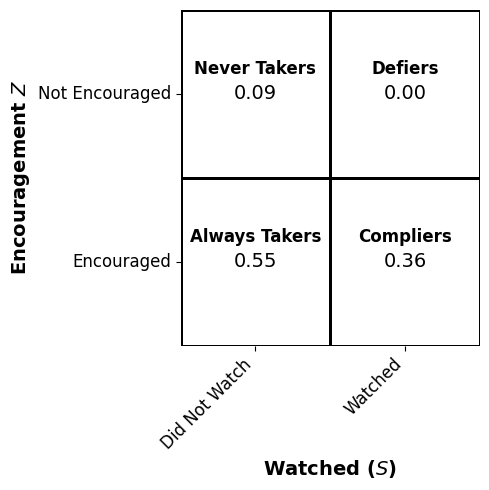

In [10]:
# Create the crosstab data directly
crosstab_data = pd.DataFrame({
    'Encouraged': ['Not Encouraged', 'Not Encouraged', 'Encouraged', 'Encouraged'],
    'Watched': ['Did Not Watch', 'Watched', 'Did Not Watch', 'Watched'],
    'Proportion': [proportion_never_takers, proportion_defiers, proportion_always_takers, proportion_compliers]
}).pivot(index='Encouraged', columns='Watched', values='Proportion')

# Reorder columns and index explicitly
crosstab_data = crosstab_data.reindex(index=['Not Encouraged', 'Encouraged'], columns=['Did Not Watch', 'Watched'])

# Define labels for each box
labels = {
    (0, 0): 'Never Takers',   # Not Encouraged, Did Not Watch
    (0, 1): 'Defiers',        # Not Encouraged, Watched
    (1, 0): 'Always Takers',  # Encouraged, Did Not Watch
    (1, 1): 'Compliers'       # Encouraged, Watched
}

# Plotting
plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(
    crosstab_data,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
    cbar=False,
    cmap=LinearSegmentedColormap.from_list('all_white', ['white', 'white']),
    annot_kws={"size": 14, "color": 'black'}
)

# Customizing the plot
plt.xlabel('Watched ($S$)', fontsize=14, fontweight='bold')
plt.ylabel('Encouragement $Z$', fontsize=14, fontweight='bold')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha='right', fontsize=12)
heatmap.set_yticklabels(heatmap.get_yticklabels(), rotation=0, fontsize=12)

# Add custom labels
for (i, j), label in labels.items():
    plt.text(j + 0.5, i + 0.5 - 0.15, label, ha='center', va='center', fontsize=12, fontweight='bold', color='black')

plt.tight_layout()
plt.show()


### Estimating the LATE


#### Via the Wald Estimator


In [11]:
itt = sesame.loc[sesame['encour'] == 1, 'y'].mean() - sesame.loc[sesame['encour'] == 0, 'y'].mean()
late_wald = itt / proportion_compliers
late_wald


7.933993399339932

#### Via the Two-Stage Least Squares (2SLS) Estimation


1) Using the first stage, we predict the likelihood of watching Sesame Street based on encouragement,

2) In the second stage, we estimate the effect of watching on academic achievement.



In [12]:
first_stage = smf.ols('watched ~ encour', data=sesame).fit()
sesame['predicted_watched'] = first_stage.fittedvalues
second_stage = smf.ols('y ~ predicted_watched', data=sesame).fit()
late_2sls_manual = second_stage.params['predicted_watched']
late_2sls_manual

7.933993399339921

## 3. Path Forward




- More on Instrumental Variables
- Introduction to Regression Discontinuity